In [278]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Lectura y exploración de datos

In [236]:
df = sns.load_dataset("mpg")
df.head()

## Buscaremos predecir el rendimiento de combustible (mpg) a partir de las otras variables

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [237]:
print('Info: \n')
print(df.info())

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [238]:
## Ya que horsepower tiene pocos valores faltantes, eliminamos esas entradas.
df2=df.dropna()
## Tambien eliminamos las variables categoricas
df3 = df2.drop(columns=['name','origin'])

In [239]:
## Estadisticos de las variables
for col in df3.columns:
    print(f"\n Summary of **{col}**")
    print(df3[col].describe())
    print("-" * 40)


 Summary of **mpg**
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
----------------------------------------

 Summary of **cylinders**
count    392.000000
mean       5.471939
std        1.705783
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64
----------------------------------------

 Summary of **displacement**
count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64
----------------------------------------

 Summary of **horsepower**
count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64
-----

In [241]:
## Matriz de correlacion
correlation_mat = df3.corr(numeric_only=True)
correlation_mat.style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


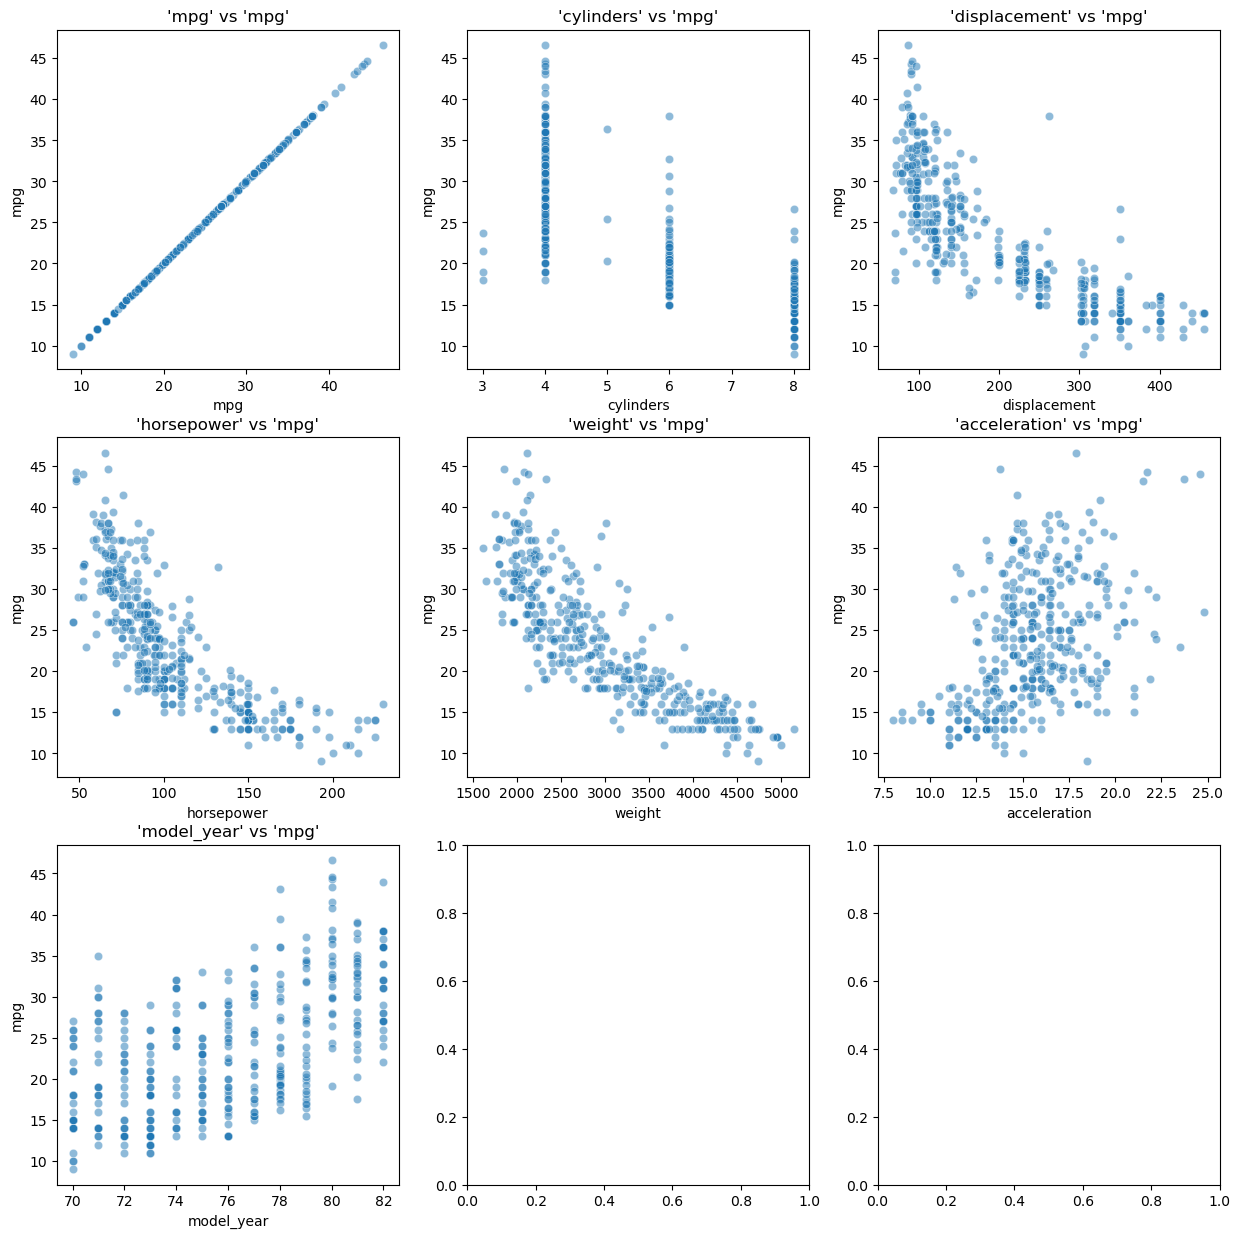

In [242]:
## Distribucion de las predictoras respecto a la variable target
fig, axes = plt.subplots(nrows=int(np.ceil(len(df3.columns) /3)), ncols=3, figsize=(15, 5 * int(np.ceil(len(df3.columns) /3))))
axes = axes.flatten()

for i,col in enumerate(df3.columns):
    sns.scatterplot(x=df3[col], y=df3['mpg'], alpha=0.5, ax=axes[i])
    axes[i].set_title(f"'{col}' vs 'mpg'")

# Entrenamiento del modelo

In [243]:
df_train, df_test = train_test_split(df3, test_size=0.2, random_state=1234)

In [244]:
print(' + '.join(df_train.columns.values))

mpg + cylinders + displacement + horsepower + weight + acceleration + model_year


In [255]:
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year'

model = smf.ols(formula=formula, data=df_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     220.3
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          6.80e-108
Time:                        23:52:26   Log-Likelihood:                -817.70
No. Observations:                 313   AIC:                             1649.
Df Residuals:                     306   BIC:                             1676.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -13.7090      5.128     -2.673   

In [267]:
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year'
#formula = 'mpg ~ weight + I(acceleration**2) + model_year'


model = smf.ols(formula=formula, data=df_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     444.4
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.05e-111
Time:                        23:55:44   Log-Likelihood:                -817.86
No. Observations:                 313   AIC:                             1644.
Df Residuals:                     309   BIC:                             1659.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -11.6300 

## Validación de supuestos

C:\Users\cg_h2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


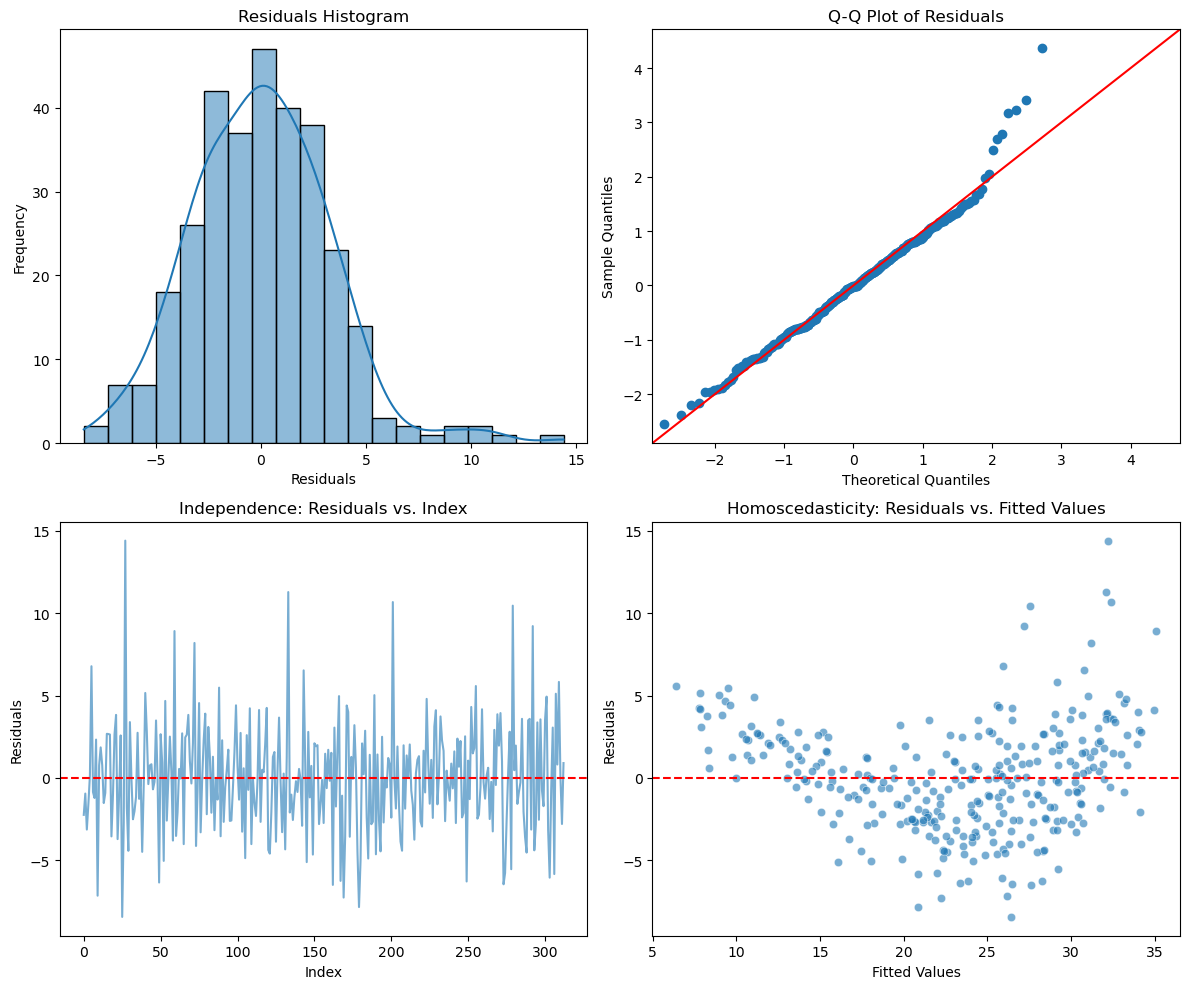

In [276]:
residuals = model.resid
fitted_values = model.fittedvalues

# Normalidad: Histograma y Q-Q Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes=axes.flatten()
    # Histograma de residuos
sns.histplot(residuals, bins=20, kde=True, ax=axes[0])
axes[0].set_title("Residuals Histogram")
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Frequency")

    # Q-Q plot 
sm.qqplot(residuals, line="45", fit=True, ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")


# Independencia: Residuos vs. Orden 

axes[2].plot(list(range(len(residuals))),residuals, alpha=0.6)
axes[2].axhline(y=0, color="r", linestyle="--")
axes[2].set_title("Independence: Residuals vs. Index")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Residuals")


# Homocedasticidad: Residuos vs. Valores predichos

sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6,ax=axes[3])
axes[3].axhline(y=0, color="r", linestyle="--")
axes[3].set_title("Homoscedasticity: Residuals vs. Fitted Values")
axes[3].set_xlabel("Fitted Values")
axes[3].set_ylabel("Residuals")


plt.tight_layout()
plt.show()

## Rendimiento del modelo

In [279]:
y_test = df_test["mpg"]
X_test = df_test.drop(columns=["mpg"])
y_pred = model.predict(X_test)

# 📌 2. Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 📌 3. Print results
print("Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-sq Score: {r2:.4f}")

Model Performance on Test Set:
Mean Absolute Error (MAE): 2.9238
Mean Squared Error (MSE): 14.6137
Root Mean Squared Error (RMSE): 3.8228
R-sq Score: 0.7945
